In [52]:
import pandas as pd

In [53]:
df = pd.read_csv("./additional/BostonHousingDataset.csv")

In [54]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [55]:
df.info() # типы данных и пропуски

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


Столбец rm содержит пропуски (5/506).

In [56]:
critical_cols = ['crim', 'nox', 'rm', 'dis', 'rad', 'tax', 'ptratio', 'medv'] # столбцы, чувствительные к нулю

df_filtered = df[~(df[critical_cols] == 0).any(axis = 1)]
df_filtered

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


В столбцах, чувствительных к нулю (0 в них приравнивается к NaN), нули не обнаружены.

In [57]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.705587,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.884000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [58]:
duplicated_raws = df[df.duplicated()]
len(duplicated_raws)

0

Дублирующиеся строки не обнаружены.

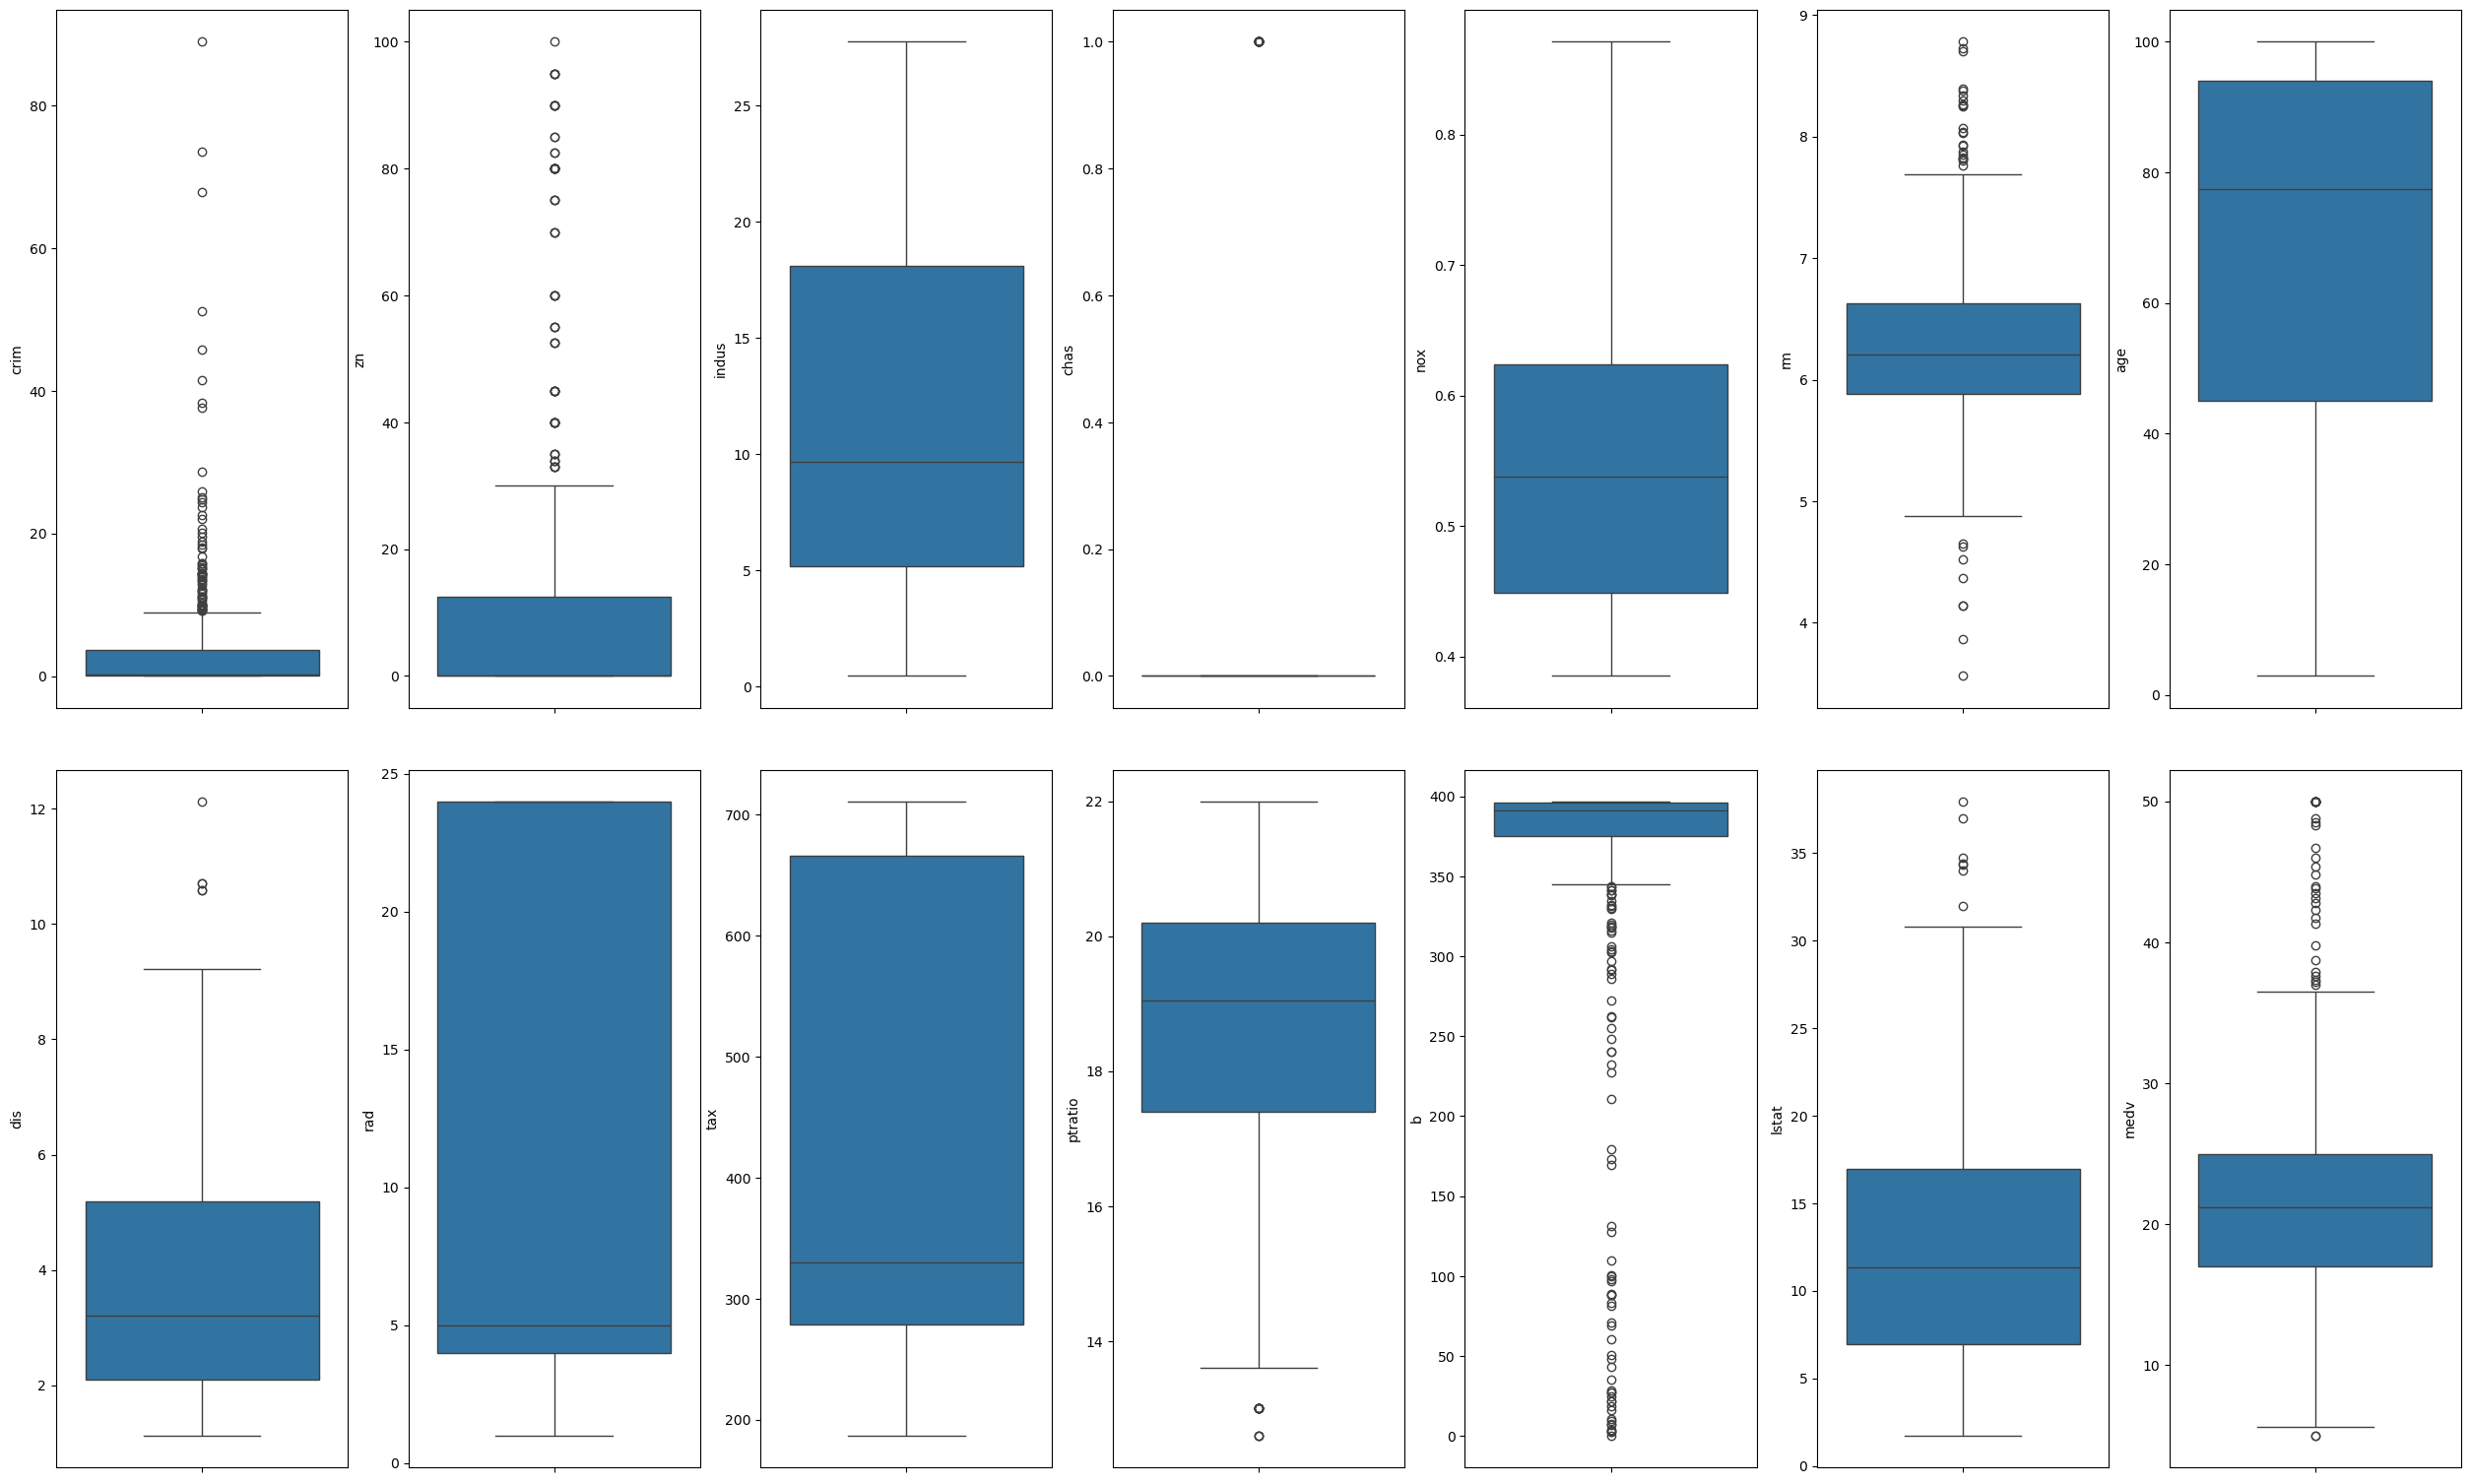

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (25, 15))
index = 0
axs = axs.flatten()
for k, v in df.items():
    sns.boxplot(y = k, data = df, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.4, h_pad = 4.0)

В столбце b большое количество выбросов, посмотрим, каким образом данные из этого столбца влияют на target:

In [60]:
import plotly.express as px

fig = px.scatter(
    df,
    x = 'b',
    y = 'medv',
    title = 'Зависимость стоимости жилья (MEDV) от признака B',
    labels = {'b': 'b (расчёт по доле Black населения)', 'medv': 'Стоимость жилья (тыс. $)'},
    trendline='ols', 
    template='plotly_white'
)

fig.show()

Имеется тренд на увеличение стоимости жилья при увеличении показателя b.

Кажется, что indus и nox должны быть сильно связаны (возможно, можно будет получить одну переменную из них), посмотрим на их зависимость:

In [61]:
fig = px.scatter(
    df,
    x = 'indus',
    y = 'nox',
    title = 'Зависимость загрязнения воздуха от уровня промышленной застройки',
    labels = {'indus': 'indus (доля промзастройки)', 'nox': 'nox (уровень загрязнения воздуха)'},
    trendline='ols', 
    template='plotly_white'
)

fig.show()

Да, действительно имеется довольно чётко прослеживающаяся линейная зависимость, в регрессионную модель стоит взять только один из этих признаков либо создать столбец, агрегирующий их.

Посмотрим на количественное распределение признаков.

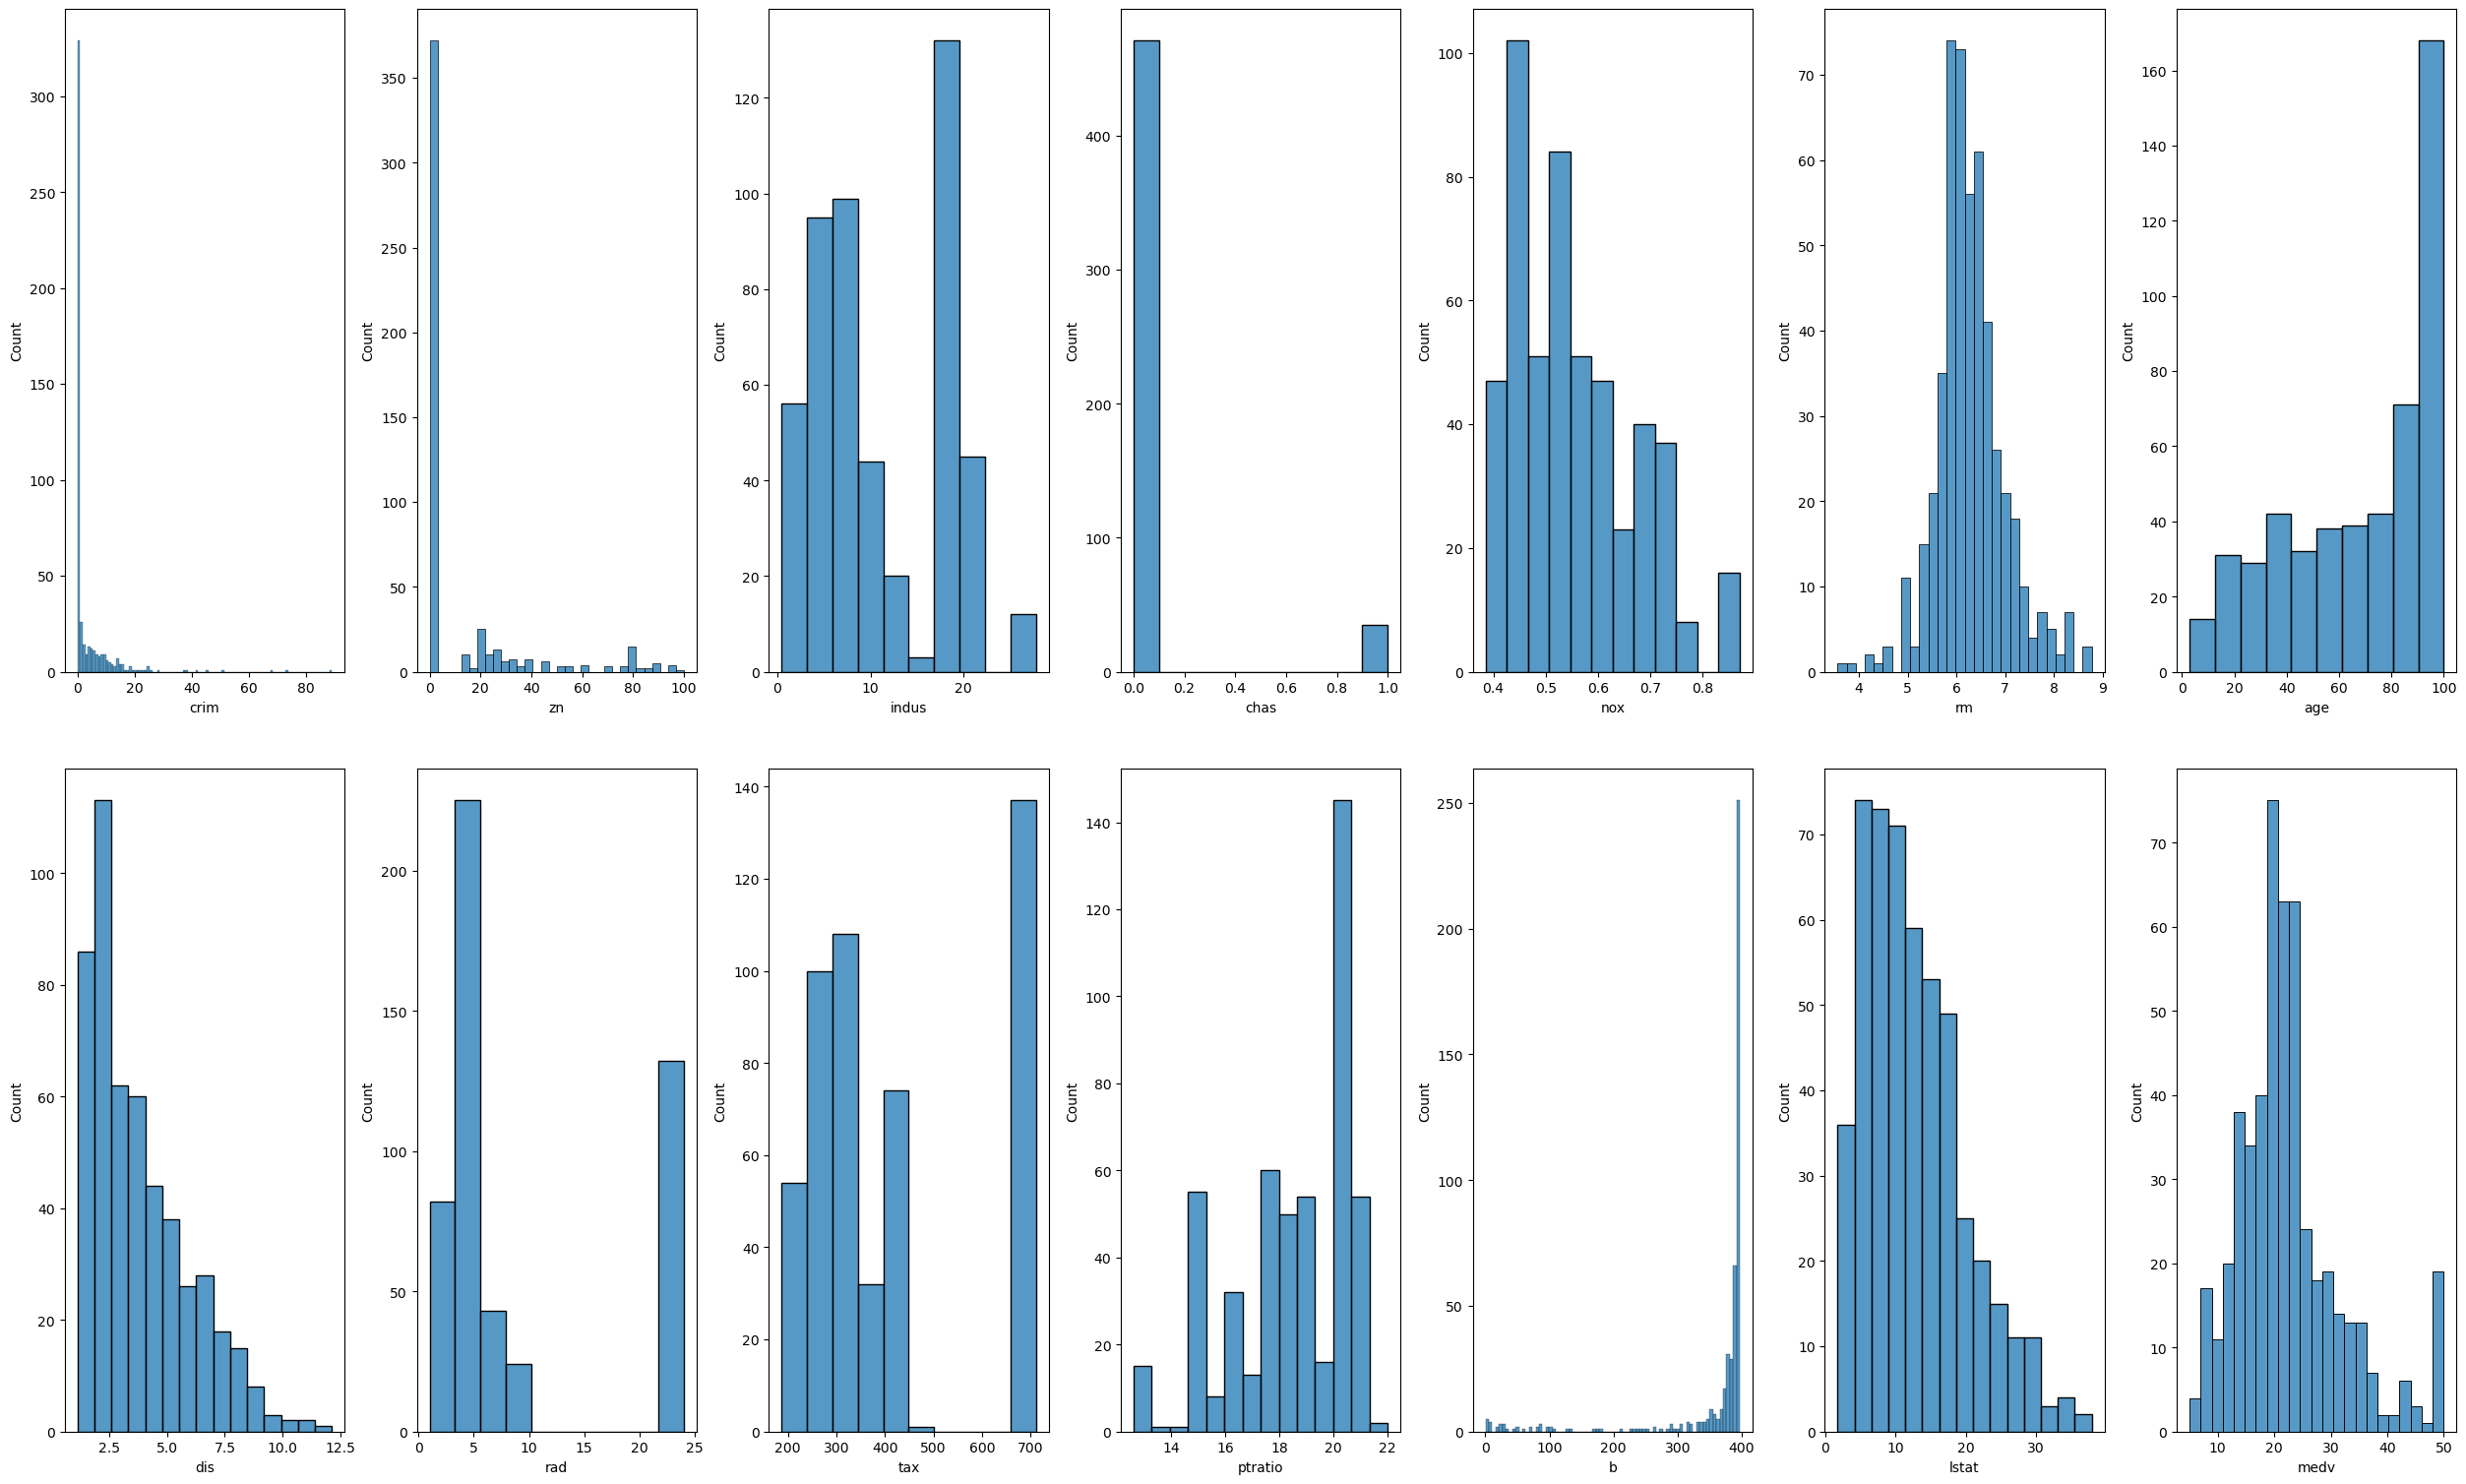

In [62]:
fig, axs = plt.subplots(ncols = 7, nrows = 2, figsize = (25, 15))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.4, h_pad = 4.0)

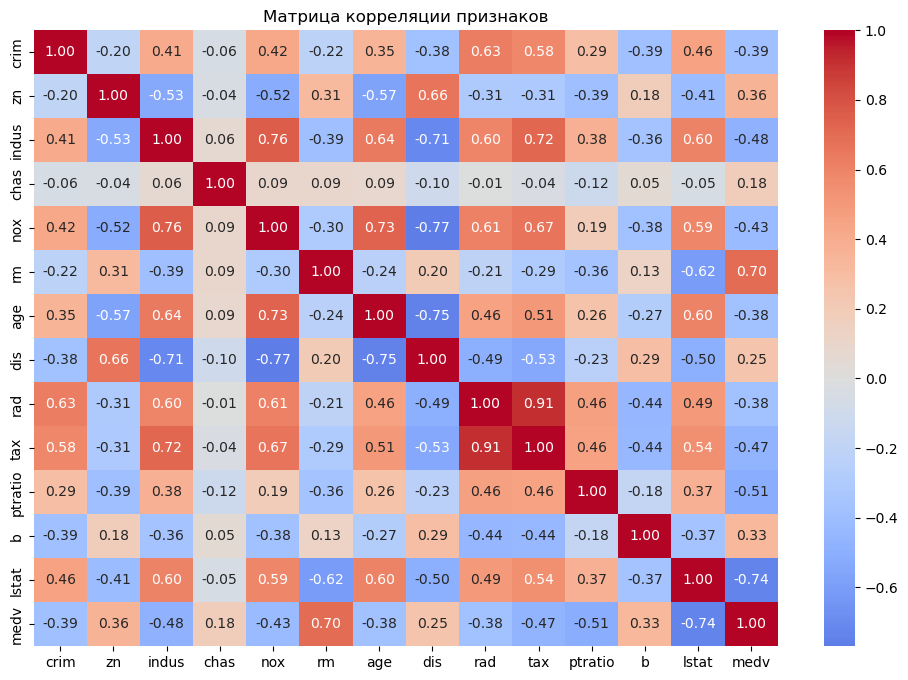

medv       1.000000
rm         0.696169
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [64]:
corr_matrix = df.corr() # расчёт корреляции

# визуализация с seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Матрица корреляции признаков')
plt.show()

# сортировка по целевой переменной
target_corr = corr_matrix['medv'].sort_values(ascending=False)
target_corr

In [65]:
# сильная корреляция
strong_corr = corr_matrix['medv'][corr_matrix['medv'].abs() > 0.5]
strong_corr.sort_values(ascending=False)

medv       1.000000
rm         0.696169
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

In [68]:
# Отсортируем признаки по модулю корреляции с целевой переменной:
target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)

medv       1.000000
lstat     -0.737663
rm         0.696169
ptratio   -0.507787
indus     -0.483725
tax       -0.468536
nox       -0.427321
crim      -0.388305
rad       -0.381626
age       -0.376955
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64

Наибольшие показатели корреляции с целевой переменной у lstat, rm, ptratio и indus. Их лучше всего использовать для построения линейной регрессии. 

In [70]:
# Так как, в столбце rm имеются пропуски, а мы используем данный столбец в линейной регрессии, заполним их медианным значением.
df['rm'] = df['rm'].fillna(df['rm'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
